### 데이터 간단 EDA 

노션이 제시하는 방향 : OTT별 고객층 인구 통계학적 특성 선호 장르 평점 경향성등 특징 비교   





In [114]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
# read csv 

netflix_df =pd.read_csv("./Netflex_data/titles.csv")
amazon_df =pd.read_csv("./Amazon_Prime_data/titles.csv")
disney_df=pd.read_csv("./Disney_TV_data/titles.csv")
paramount_df=pd.read_csv("./Paramount_data/titles.csv")



In [116]:
# plattfrom service 정해주기 
amazon_df = (amazon_df.assign(Platform="amazon"))
disney_df = (disney_df.assign(Platform="disney"))
paramount_df = (paramount_df.assign(Platform="paramount"))
netflix_df = (netflix_df.assign(Platform="netflix"))


In [117]:
# id, ibmb id, description 버려도 되는 컬럼 같아서 없앰
df_list = [amazon_df, disney_df, paramount_df, netflix_df]
df = (pd.concat(df_list).reset_index(drop=True).drop(columns=['id',"imdb_id","description"]))
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform
0,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6,amazon
1,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,8.2,89766.0,8.647,8.0,amazon
2,The Best Years of Our Lives,MOVIE,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,8.1,63026.0,8.435,7.8,amazon
3,His Girl Friday,MOVIE,1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,7.8,57835.0,11.270,7.4,amazon
4,In a Lonely Place,MOVIE,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,7.9,30924.0,8.273,7.6,amazon


In [118]:
"""
각 계절마다 보는 영화나 쇼 
런타임 긴 영화 순위 짧은 영화 순위 

"""
df.describe()


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,20081.000000,20081.000000,4504.00000,17939.000000,1.791000e+04,19375.000000,17091.000000
mean,2004.400229,79.423883,2.64365,6.184843,1.917149e+04,15.082909,6.344228
std,24.271711,36.089967,3.71847,1.292510,9.054001e+04,96.350618,1.434322
min,1912.000000,0.000000,1.00000,1.100000,5.000000e+00,0.000011,0.500000
25%,2003.000000,52.000000,1.00000,5.400000,1.770000e+02,1.580000,5.600000
50%,2016.000000,85.000000,1.00000,6.300000,8.340000e+02,3.605000,6.400000
75%,2019.000000,100.000000,3.00000,7.100000,4.677500e+03,9.560500,7.300000
max,2022.000000,549.000000,51.00000,9.900000,2.294231e+06,9323.832000,10.000000


In [119]:
df.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.009208,-0.448258,0.091846,0.017599,0.059085,0.211519
runtime,-0.009208,1.000000,-0.064353,-0.133226,0.155847,-0.006736,-0.210186
seasons,-0.448258,-0.064353,1.000000,0.025739,0.139408,0.058883,-0.025617
imdb_score,0.091846,-0.133226,0.025739,1.000000,0.194870,0.055313,0.603145
imdb_votes,0.017599,0.155847,0.139408,0.194870,1.000000,0.169149,0.150164
tmdb_popularity,0.059085,-0.006736,0.058883,0.055313,0.169149,1.000000,0.084093
tmdb_score,0.211519,-0.210186,-0.025617,0.603145,0.150164,0.084093,1.000000


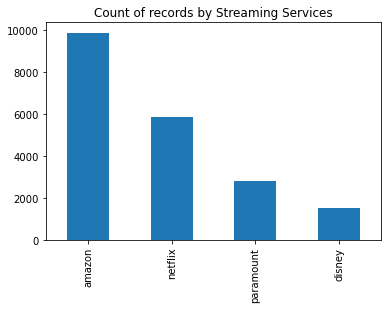

In [120]:
# 각 플랫폼 영화 숫자 파악 
#pokemon["Type 2"].value_counts().plot(kind="bar")
#"Count of records by Streaming Services"

df["Platform"].value_counts().plot(kind="bar")
plt.title("Count of records by Streaming Services")
plt.show()

<AxesSubplot:xlabel='tmdb_popularity', ylabel='Density'>

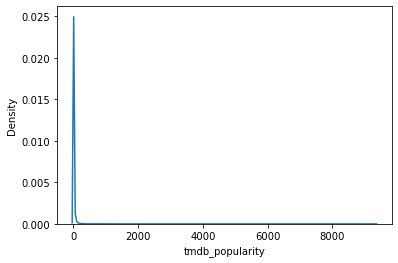

In [121]:

# vote 시각화 해보기 
sns.kdeplot(df["tmdb_popularity"])

In [122]:
df.shape

(20081, 13)

In [123]:
# 4개 모두 만족 확인 
df[(df["imdb_votes"].isna()==True)&(df["imdb_score"].isna()==True)&(df["tmdb_popularity"].isna()==True)&(df["tmdb_score"].isna()==True)]


,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform
672,Ye Shang Hai,MOVIE,1941,NaN,62,['drama'],[],NaN,NaN,NaN,NaN,NaN,amazon
731,Peculiar Pets,MOVIE,1921,NaN,47,['documentation'],[],NaN,NaN,NaN,NaN,NaN,amazon
795,Sri Valli,MOVIE,1945,NaN,114,['drama'],[],NaN,NaN,NaN,NaN,NaN,amazon
1661,Dhonni Meye,MOVIE,1975,NaN,133,['drama'],[],NaN,NaN,NaN,NaN,NaN,amazon
1664,John Brown's Body,MOVIE,1962,NaN,90,['drama'],[],NaN,NaN,NaN,NaN,NaN,amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,Patton Oswalt: I Love Everything,SHOW,2020,NaN,60,[],[],1.0,NaN,NaN,NaN,NaN,netflix
19714,My Little Pony: A New Generation: Sing-Along,MOVIE,2022,NaN,90,[],[],NaN,NaN,NaN,NaN,NaN,netflix
19738,Bridgerton - The Afterparty,MOVIE,2021,NaN,38,[],['US'],NaN,NaN,NaN,NaN,NaN,netflix
20041,Social Man,MOVIE,2021,NaN,96,"['comedy', 'drama']",[],NaN,NaN,NaN,NaN,NaN,netflix


In [124]:
# 4개 만족하는거 drop하기 
index_drop=df[(df["imdb_votes"].isna()==True)&(df["imdb_score"].isna()==True)&(df["tmdb_popularity"].isna()==True)&(df["tmdb_score"].isna()==True)].index
df.drop(index_drop,inplace=True)



In [125]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform
0,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6,amazon
1,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,8.2,89766.0,8.647,8.0,amazon
2,The Best Years of Our Lives,MOVIE,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,8.1,63026.0,8.435,7.8,amazon
3,His Girl Friday,MOVIE,1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,7.8,57835.0,11.270,7.4,amazon
4,In a Lonely Place,MOVIE,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,7.9,30924.0,8.273,7.6,amazon


In [126]:
# 결측치 확인 
df.isnull().sum()

title                       0
type                        0
release_year                0
age_certification       10722
runtime                     0
genres                      0
production_countries        0
seasons                 15384
imdb_score               1882
imdb_votes               1911
tmdb_popularity           446
tmdb_score               2730
Platform                    0
dtype: int64

In [127]:
# title 결측치 삭제 하기 
df = df[~df["title"].isnull()]


# age_certification 결측치 없에기 

print(df["age_certification"].unique())
df["age_certification"].fillna("Not Rated",inplace=True)

# seasons의 nan은 0으로 하기 
df["seasons"].fillna(0,inplace=True)


#나머지 결측치는 평균값으로 하기 
df["imdb_score"].fillna(df["imdb_score"].mean(),inplace=True)
df["imdb_votes"].fillna(df["imdb_votes"].mode()[0],inplace=True)
df["tmdb_popularity"].fillna(df["tmdb_popularity"].mode()[0],inplace=True)
df["tmdb_score"].fillna(df["tmdb_score"].mean(),inplace=True)


['TV-PG' nan 'PG' 'G' 'PG-13' 'R' 'TV-G' 'TV-Y' 'TV-14' 'NC-17' 'TV-Y7'
 'TV-MA']


In [128]:
# 결측치 확인 
df.isnull().sum()

title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
Platform                0
dtype: int64

In [129]:
df.shape

(19821, 13)

In [130]:
M=df["imdb_votes"].sort_values(ascending=False).iloc[250]

In [131]:
C=df["imdb_votes"].mean()

In [132]:

#imdb_pop 계산 


df["imdb_pop"] = (df["imdb_votes"]/(df["imdb_votes"]+M))*df["imdb_score"] +(M/(df["imdb_votes"]+M))*C




In [133]:
normalization_df_imdb_score=(df["imdb_score"]-df["imdb_score"].min())/(df["imdb_score"].max()-df["imdb_score"].min())
noraml_imdb_votes=(df["imdb_votes"]-df["imdb_votes"].min())/(df["imdb_votes"].max()-df["imdb_votes"].min())


df["imdb_scor_nor"] = normalization_df_imdb_score
df["imdb_vote_nor"]=noraml_imdb_votes

In [134]:
scor_mean=df["imdb_scor_nor"].mean()
vote_mean = df["imdb_vote_nor"].mean()

In [135]:
df["imdb_scor_nor"].sort_values(ascending=False)

9135     1.000000
7783     0.977273
10886    0.977273
16889    0.965909
14447    0.954545
           ...   
4541     0.045455
4782     0.022727
4434     0.022727
4048     0.011364
7764     0.000000
Name: imdb_scor_nor, Length: 19821, dtype: float64

In [136]:
df["imdb_vote_nor"].sort_values(ascending=False)

14468    1.000000
14328    0.881054
12483    0.869397
12479    0.864220
11955    0.776104
           ...   
1736     0.000000
13473    0.000000
6931     0.000000
8278     0.000000
6976     0.000000
Name: imdb_vote_nor, Length: 19821, dtype: float64

In [137]:
mean_over = df[(df["imdb_scor_nor"]>=scor_mean)&(df["imdb_vote_nor"]>=vote_mean)]
mean_over["new_metrix"] = df["imdb_scor_nor"]*df["imdb_vote_nor"]
mean_over

C:\Users\maeng\AppData\Local\Temp/ipykernel_38472/2265880420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_over["new_metrix"] = df["imdb_scor_nor"]*df["imdb_vote_nor"]


,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform,imdb_pop,imdb_scor_nor,imdb_vote_nor,new_metrix
1,The General,MOVIE,1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,8.2,89766.0,8.647,8.0,amazon,13430.527805,0.806818,0.039125,0.031567
2,The Best Years of Our Lives,MOVIE,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,8.1,63026.0,8.435,7.8,amazon,14394.110857,0.795455,0.027469,0.021851
3,His Girl Friday,MOVIE,1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,7.8,57835.0,11.270,7.4,amazon,14597.390186,0.761364,0.025207,0.019192
4,In a Lonely Place,MOVIE,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,7.9,30924.0,8.273,7.6,amazon,15750.913432,0.772727,0.013477,0.010414
5,Stagecoach,MOVIE,1939,Not Rated,96,"['western', 'drama']",['US'],0.0,7.8,48149.0,11.786,7.7,amazon,14992.572349,0.761364,0.020985,0.015977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19540,Sooryavanshi,MOVIE,2021,Not Rated,145,"['action', 'thriller', 'crime']",['IN'],0.0,6.3,75952.0,121.867,5.7,netflix,13911.257358,0.590909,0.033104,0.019561
19745,Below Zero,MOVIE,2021,Not Rated,106,"['action', 'crime', 'thriller', 'horror', 'dra...",['ES'],0.0,6.2,19201.0,49.755,6.4,netflix,16312.376845,0.579545,0.008367,0.004849
19761,Dasvi,MOVIE,2022,Not Rated,125,"['comedy', 'drama']",['IN'],0.0,7.4,21050.0,3.327,5.7,netflix,16221.226114,0.715909,0.009173,0.006567
19853,Haseen Dillruba,MOVIE,2021,Not Rated,135,"['romance', 'thriller', 'crime', 'drama']",['IN'],0.0,6.9,26194.0,15.216,6.4,netflix,15972.694154,0.659091,0.011415,0.007524


In [138]:
ddd=mean_over["new_metrix"].sort_values()
ddd  
#평균값으로 해도 기준이 이상하다 --결론

1015     0.004529
12001    0.004529
10471    0.004558
16345    0.004569
7428     0.004638
           ...   
14447    0.738924
12483    0.760723
12479    0.766014
14328    0.770923
14468    0.875000
Name: new_metrix, Length: 1857, dtype: float64

In [139]:
for i in range(20):
    print(df.iloc[ddd.index[i]]["title"])

Exodus
Run for the Sun
Cosmos: A Spacetime Odyssey
The Platform
Dark Light
Warriors of Liberty City
Skin Deep
Going for Gold
The Great Interior Design Challenge
The Phantom Cat
Red Hill
Bloodride
Serious Men
Disney Channel Games
Sam Smith: Love Goes – Live at Abbey Road Studios
De Gaulle
Girlfriend's Day
Gordon Ramsay: Uncharted
The Wonder Pets
Forces of Nature


In [140]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform,imdb_pop,imdb_scor_nor,imdb_vote_nor
0,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6,amazon,17263.281817,0.852273,0.000474
1,The General,MOVIE,1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,8.2,89766.0,8.647,8.0,amazon,13430.527805,0.806818,0.039125
2,The Best Years of Our Lives,MOVIE,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,8.1,63026.0,8.435,7.8,amazon,14394.110857,0.795455,0.027469
3,His Girl Friday,MOVIE,1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,7.8,57835.0,11.270,7.4,amazon,14597.390186,0.761364,0.025207
4,In a Lonely Place,MOVIE,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,7.9,30924.0,8.273,7.6,amazon,15750.913432,0.772727,0.013477


In [141]:
plt.figure(figsize=(12,10))
#sns.scatterplot(data=df,x="imdb_score",y="imdb_votes",hue="imdb_pop_nor")

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>


지금 결측치가 age_certification과 seasons가 많이 있다 

1. movie && not rate 결과 있다 

2. show&& not rate 결과도 있다 

3. seasons가 0인건(결측치) 모두 movie이다 - 보통 영화 한편을 1 seasons라고 하지 않으니까 0으로 대체  






In [142]:
# seasons가 0인것 확인해보기 
o=df[df["seasons"]==0]
o[o["type"]=="SHOW"]  # season이 0인건 모두 movies이다 


,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform,imdb_pop,imdb_scor_nor,imdb_vote_nor


<AxesSubplot:>

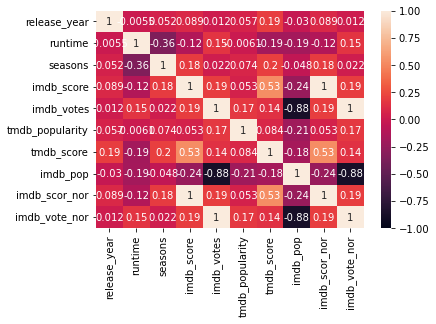

In [143]:
# 상관관계 heatmap 

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

(0.0, 600.0)

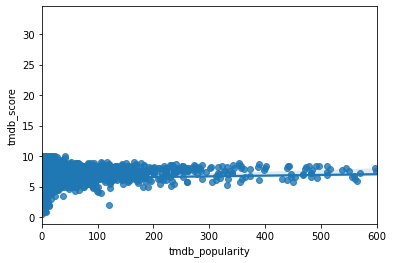

In [144]:
sns.regplot(data=df,x="tmdb_popularity",y="tmdb_score")
plt.xlim([0,600])

<AxesSubplot:xlabel='runtime', ylabel='Density'>

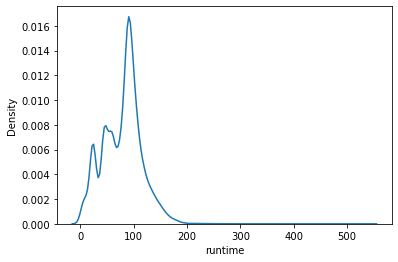

In [145]:
sns.kdeplot(data=df["runtime"])

<AxesSubplot:xlabel='type', ylabel='count'>

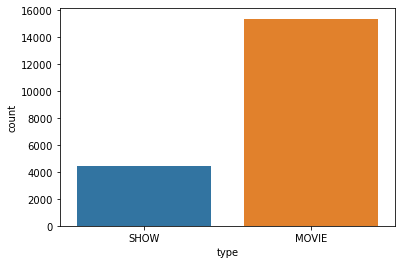

In [146]:
# movie show 시각화 
sns.countplot(data=df,x="type")


<AxesSubplot:xlabel='age_certification', ylabel='count'>

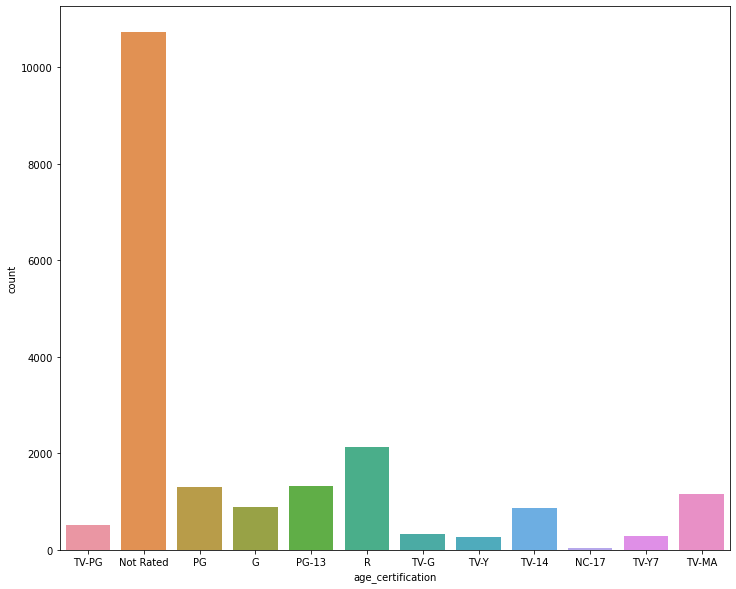

In [147]:
# age_criteran 시각화 
plt.figure(figsize=(12,10))
sns.countplot(data=df,x="age_certification")


In [148]:
# 장르 나누고 시각화 하기 [영화 ,show]
import re


#f = lambda x : re.findall("\w+",x)
#type(f(df.iloc[0]["genres"])) -> list 

df["genres"] =df["genres"].apply(lambda x : re.findall("\w+",x))
genres_list = list(df["genres"].values)

new_genres_list =[]
for sublist in genres_list:
    for item in sublist:
        new_genres_list.append(item)



new_genres_list = set(new_genres_list)

for i,genre in enumerate(new_genres_list):
    df[genre]=df["genres"].apply(lambda x: 1 if genre in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기

    
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,...,romance,documentation,war,horror,thriller,fantasy,music,comedy,scifi,drama
0,The Three Stooges,SHOW,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",['US'],26.0,8.6,1092.0,...,0,0,0,1,0,1,0,1,0,0
1,The General,MOVIE,1926,Not Rated,78,"[action, drama, war, western, comedy, european]",['US'],0.0,8.2,89766.0,...,0,0,1,0,0,0,0,1,0,1
2,The Best Years of Our Lives,MOVIE,1946,Not Rated,171,"[romance, war, drama]",['US'],0.0,8.1,63026.0,...,1,0,1,0,0,0,0,0,0,1
3,His Girl Friday,MOVIE,1940,Not Rated,92,"[comedy, drama, romance]",['US'],0.0,7.8,57835.0,...,1,0,0,0,0,0,0,1,0,1
4,In a Lonely Place,MOVIE,1950,Not Rated,94,"[thriller, drama, romance]",['US'],0.0,7.9,30924.0,...,1,0,0,0,1,0,0,0,0,1


In [149]:
# 시각화 위한 전처리 

# 영화중에서 각 장르별 개수 센다 
genre_movie_dict = {}

for genre in new_genres_list:
    genre_movie_dict[genre] = df.query("type == 'MOVIE'")[genre].sum()

genre_movie_dict = dict(sorted(genre_movie_dict.items(), key=lambda x: x[0]))

# show중에서 장르별 개수 센다 
genre_series_dict = {}

for genre in new_genres_list:
    genre_series_dict[genre] = df.query("type == 'SHOW'")[genre].sum()

genre_series_dict = dict(sorted(genre_series_dict.items(), key=lambda x: x[0]))




<AxesSubplot:>

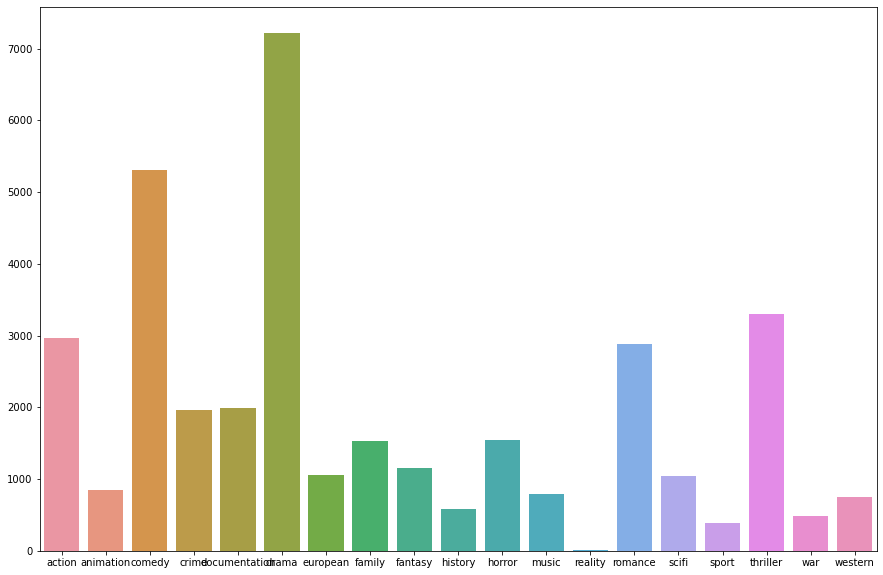

In [150]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
movie_genres=pd.DataFrame.from_dict(genre_movie_dict,orient="index").T
sns.barplot(data=movie_genres)

<AxesSubplot:>

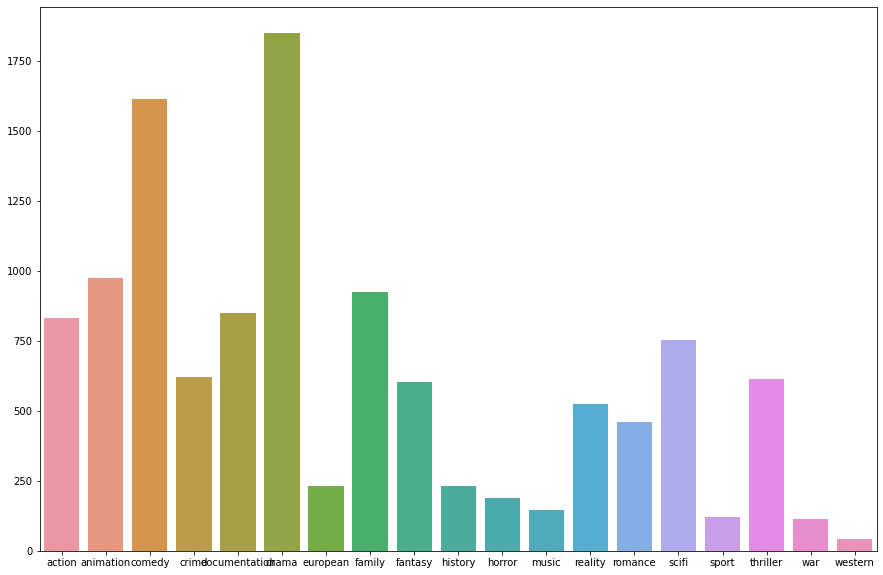

In [151]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
show_genres=pd.DataFrame.from_dict(genre_series_dict,orient="index").T
sns.barplot(data=show_genres)

In [152]:
# 장르별 ibdm score 시각화 하기 -> 평균값으로 했다 

genre_movie_idbdm={}
genre_show_idbdm={}

for i,genre in enumerate(new_genres_list):
    genre_movie_idbdm[genre] = df[df["type"]=="MOVIE"].groupby(genre)["imdb_score"].mean().sort_index().__getitem__(1)

    
    
for i,genre in enumerate(new_genres_list):
    genre_show_idbdm[genre] = df[df["type"]=="SHOW"].groupby(genre)["imdb_score"].mean().sort_index().__getitem__(1)
    



<AxesSubplot:>

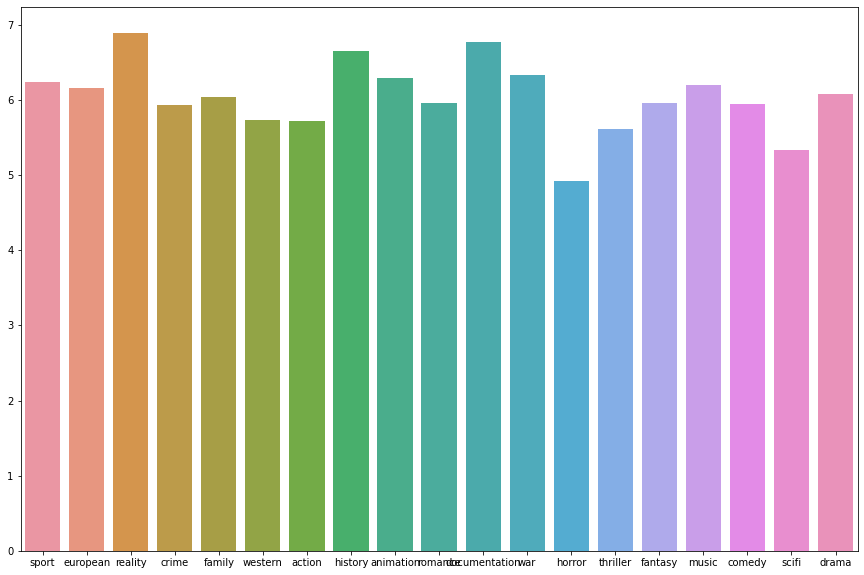

In [153]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
movie_genr=pd.DataFrame.from_dict(genre_movie_idbdm,orient="index").T
sns.barplot(data=movie_genr)

<AxesSubplot:>

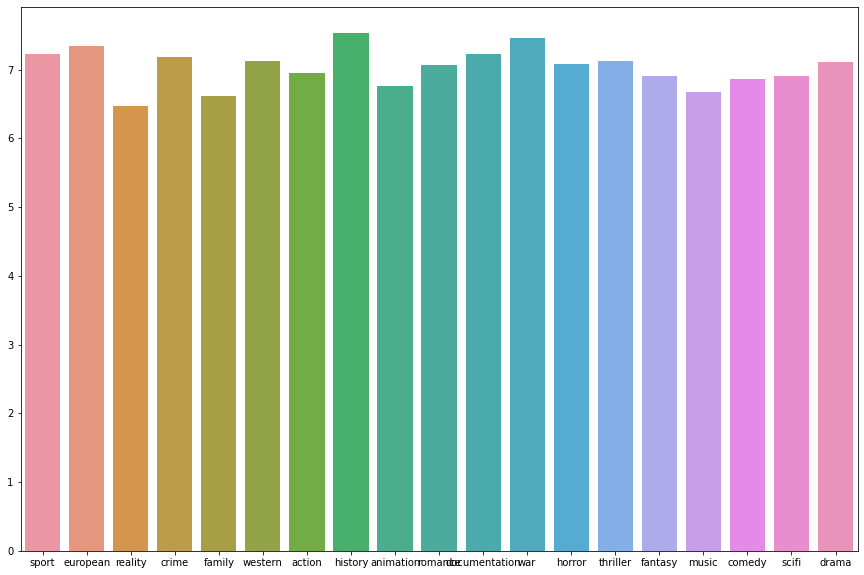

In [154]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
show_genr=pd.DataFrame.from_dict(genre_show_idbdm,orient="index").T
sns.barplot(data=show_genr)

In [155]:
df['production_countries'].value_counts().index[:20]

Index(['['US']', '['IN']', '['GB']', '[]', '['CA']', '['JP']', '['KR']',
       '['FR']', '['AU']', '['ES']', '['CA', 'US']', '['CN']', '['XX']',
       '['GB', 'US']', '['MX']', '['IT']', '['DE']', '['BR']', '['US', 'CA']',
       '['PH']'],
      dtype='object')

<AxesSubplot:xlabel='production_countries', ylabel='count'>

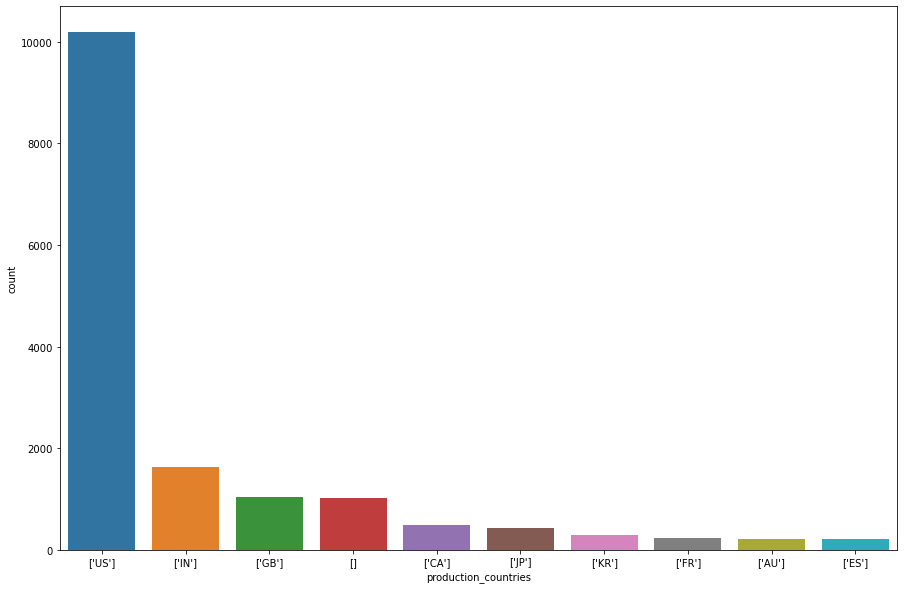

In [156]:
# 나라별 시각화 

plt.figure(figsize=(15,10))

sns.countplot(data=df,x="production_countries",order = df['production_countries'].value_counts().index[:10]) 
# 각 독립적인 나라별로만 시각화 한것이다
